In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Gadget_pack.units as unt
import pandas as pd
#plt.interactive(True)

In [2]:
acc_data = !ls ../acc_duomenys_100/
acc_data=acc_data[:]
acc_data;

In [3]:
samples0 = !ls ../acc_duomenys_100/*ang*
sorted(samples0)

['../acc_duomenys_100/acc_data_torgood_ang000.npy',
 '../acc_duomenys_100/acc_data_torgood_ang015.npy',
 '../acc_duomenys_100/acc_data_torgood_ang030.npy',
 '../acc_duomenys_100/acc_data_torgood_ang045.npy',
 '../acc_duomenys_100/acc_data_torgood_ang060.npy',
 '../acc_duomenys_100/acc_data_torgood_ang075.npy',
 '../acc_duomenys_100/acc_data_torgood_ang090.npy',
 '../acc_duomenys_100/acc_data_torgood_ang105.npy',
 '../acc_duomenys_100/acc_data_torgood_ang120.npy',
 '../acc_duomenys_100/acc_data_torgood_ang135.npy',
 '../acc_duomenys_100/acc_data_torgood_ang150.npy',
 '../acc_duomenys_100/acc_data_torgood_ang165.npy',
 '../acc_duomenys_100/acc_data_torgood_ang180.npy']

In [4]:
samples0 = !ls ../acc_duomenys_100/*ang*
#print(samples0)
samples1 = !ls ../acc_duomenys_100/*_1.npy
samples1;
samples2 = !ls ../acc_duomenys_100/*_2.npy
samples3 = !ls ../acc_duomenys_100/*_3.npy

In [5]:
Samples0 = []
Samples1 = []
Samples2 = []
Samples3 = []

for i in range(np.shape(samples0)[0]):
    Samples0.append(np.load(samples0[i]))
    Samples1.append(np.load(samples1[i]))
    Samples2.append(np.load(samples2[i]))
    Samples3.append(np.load(samples3[i]))

In [6]:
angle = np.arange(0,181,15)
#Samples0[i][0,:].shape
len(Samples0)
mtot0 = []
mtot1 = []
mtot2 = []
mtot3 = []
for i in range(len(Samples0)):
    mtot0.append(Samples0[i][1,-1])
    mtot1.append(Samples1[i][1,-1])
    mtot2.append(Samples2[i][1,-1])
    mtot3.append(Samples3[i][1,-1])
    
mtot0 = np.array(mtot0)
mtot1 = np.array(mtot1)
mtot2 = np.array(mtot2)
mtot3 = np.array(mtot3)
#print(mtot0 / unt.M_s)

['../acc_duomenys_100/acc_data_torgood_ang000.npy', '../acc_duomenys_100/acc_data_torgood_ang015.npy', '../acc_duomenys_100/acc_data_torgood_ang030.npy', '../acc_duomenys_100/acc_data_torgood_ang045.npy', '../acc_duomenys_100/acc_data_torgood_ang060.npy', '../acc_duomenys_100/acc_data_torgood_ang075.npy', '../acc_duomenys_100/acc_data_torgood_ang090.npy', '../acc_duomenys_100/acc_data_torgood_ang105.npy', '../acc_duomenys_100/acc_data_torgood_ang120.npy', '../acc_duomenys_100/acc_data_torgood_ang135.npy', '../acc_duomenys_100/acc_data_torgood_ang150.npy', '../acc_duomenys_100/acc_data_torgood_ang165.npy', '../acc_duomenys_100/acc_data_torgood_ang180.npy']


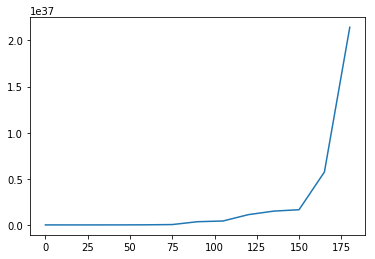

In [7]:
plt.plot(angle, mtot0)
print(samples0)

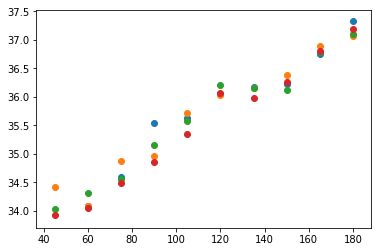

In [8]:
#%matplotlib notebook
#toliau dirbu su vienu sample
lnM0 = np.log10(mtot0)
lnM1 = np.log10(mtot1)
lnM2 = np.log10(mtot2)
lnM3 = np.log10(mtot3)
#
riba = 8e33
plt.scatter(angle[mtot0 > riba], lnM0[mtot0 > riba])
plt.scatter(angle[mtot1 > riba], lnM1[mtot1 > riba])
plt.scatter(angle[mtot2 > riba], lnM2[mtot2 > riba])
plt.scatter(angle[mtot3 > riba], lnM3[mtot3 > riba])
#lnM0

In [9]:

def bootstrap(x_data, y_data):
    select = np.random.randint(0, len(x_data), len(x_data))
    x_boot = x_data[select]
    y_boot = y_data[select]
    
    #plt.scatter(x_data, y_data, s=200, c='None',
    #           edgecolor='k')
    #plt.scatter(x_boot, y_boot, s=50, c='k', 
    #            alpha=0.25)
    k_boot, b_boot = np.polyfit(x_boot, y_boot, 1)
    
    return k_boot, b_boot

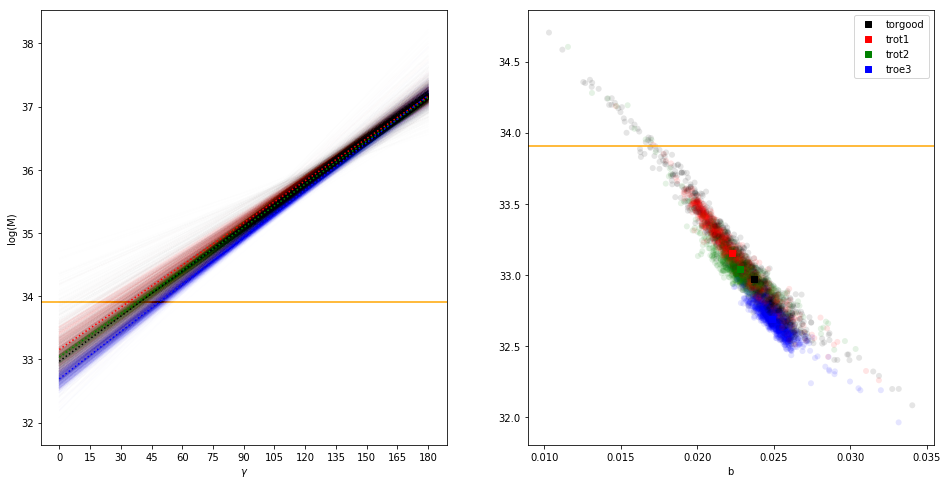

In [11]:
#%matplotlib notebook
K_boot0 = np.zeros(1000)
B_boot0 = np.zeros(1000)
K_boot1 = np.zeros(1000)
B_boot1 = np.zeros(1000)
K_boot2 = np.zeros(1000)
B_boot2 = np.zeros(1000)
K_boot3 = np.zeros(1000)
B_boot3 = np.zeros(1000)

k_sample0, b_sample0 =  np.polyfit(angle[mtot0 > riba], lnM0[mtot0 > riba], 1)
k_sample1, b_sample1 =  np.polyfit(angle[mtot1 > riba], lnM1[mtot1 > riba], 1)
k_sample2, b_sample2 =  np.polyfit(angle[mtot2 > riba], lnM2[mtot2 > riba], 1)
k_sample3, b_sample3 =  np.polyfit(angle[mtot3 > riba], lnM3[mtot3 > riba], 1)

for i in range(1000):
    K_boot0[i], B_boot0[i] = bootstrap(angle[mtot0 > riba], lnM0[mtot0 > riba])
    K_boot1[i], B_boot1[i] = bootstrap(angle[mtot1 > riba], lnM1[mtot1 > riba])
    K_boot2[i], B_boot2[i] = bootstrap(angle[mtot2 > riba], lnM2[mtot2 > riba])
    K_boot3[i], B_boot3[i] = bootstrap(angle[mtot3 > riba], lnM3[mtot3 > riba])
    
    
#ax[0].set_title("k*x + b")


x = np.linspace(0, 180, 100)
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].axhline(np.log10(riba),color="orange")
ax[1].axhline(np.log10(riba),color="orange")
for i in range(1000):
    ax[0].plot(x, K_boot0[i] * x + B_boot0[i], color='k', alpha=0.005)
    ax[1].scatter(K_boot0[i], B_boot0[i], marker='o', edgecolor="None",\
                  alpha=0.1, c='k')
    
    ax[0].plot(x, K_boot1[i] * x + B_boot1[i], color='r', alpha=0.005)
    ax[1].scatter(K_boot1[i], B_boot1[i], marker='o', edgecolor="None",\
                  alpha=0.1, c='r')
    
    ax[0].plot(x, K_boot2[i] * x + B_boot2[i], color='g', alpha=0.005)
    ax[1].scatter(K_boot2[i], B_boot2[i], marker='o', edgecolor="None",\
                  alpha=0.1, c='g')
    
    ax[0].plot(x, K_boot3[i] * x + B_boot3[i], color='b', alpha=0.005)
    ax[1].scatter(K_boot3[i], B_boot3[i], marker='o', edgecolor="None",\
                  alpha=0.1, c='b')

ax[0].plot(x, x*k_sample0 + b_sample0, c='k', linestyle=':', zorder=900)
ax[0].plot(x, x*k_sample1 + b_sample1, c='r', linestyle=':',zorder=900)
ax[0].plot(x, x*k_sample2 + b_sample2, c='g', linestyle=':',zorder=900)
ax[0].plot(x, x*k_sample3 + b_sample3, c='b', linestyle=':',zorder=900)

ax[1].scatter(k_sample0, b_sample0, c='k', zorder=900, marker='s', label="torgood")
ax[1].scatter(k_sample1, b_sample1, c='r', zorder=900, marker='s', label="trot1")
ax[1].scatter(k_sample2, b_sample2, c='g', zorder=900, marker='s', label="trot2")
ax[1].scatter(k_sample3, b_sample3, c='b', zorder=900, marker='s', label="troe3")


ax[0].set_xlabel("$\\gamma$")
ax[1].set_xlabel("k")
ax[0].set_ylabel("log(M)")
ax[1].set_xlabel("b")
ax[0].set_xticks(angle)
ax[1].legend()

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   5.,   5.,
         19., 255., 426., 233.,  40.,  10.,   4.,   1.,   1.,   0.,   0.,
          0.,   0.]),
 array([31.   , 31.125, 31.25 , 31.375, 31.5  , 31.625, 31.75 , 31.875,
        32.   , 32.125, 32.25 , 32.375, 32.5  , 32.625, 32.75 , 32.875,
        33.   , 33.125, 33.25 , 33.375, 33.5  , 33.625, 33.75 , 33.875,
        34.   ]),
 <a list of 1 Patch objects>)

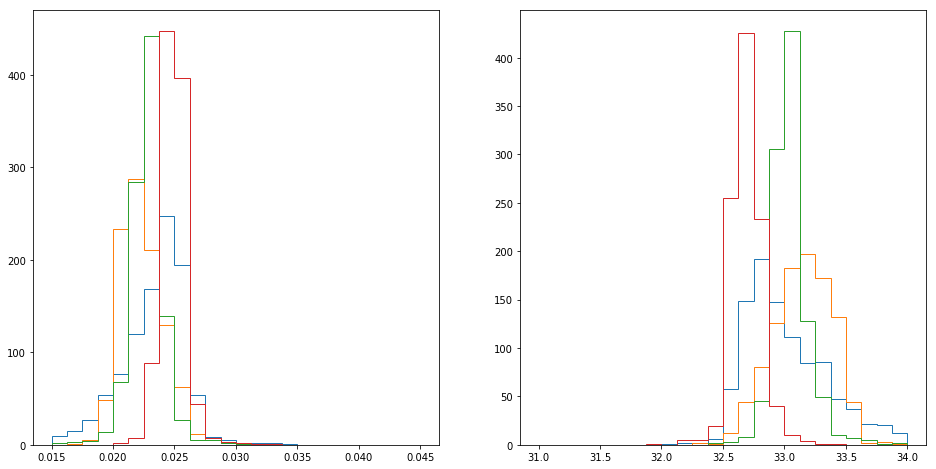

In [12]:
fig, ax = plt.subplots(1,2, figsize=(16,8))

ax[0].hist(K_boot0, bins=np.linspace(0.015,0.045,25), histtype='step')
ax[0].hist(K_boot1, bins=np.linspace(0.015,0.045,25), histtype='step')
ax[0].hist(K_boot2, bins=np.linspace(0.015,0.045,25), histtype='step')
ax[0].hist(K_boot3, bins=np.linspace(0.015,0.045,25), histtype='step')

ax[1].hist(B_boot0, bins=np.linspace(31,34,25), histtype='step')
ax[1].hist(B_boot1, bins=np.linspace(31,34,25), histtype='step')
ax[1].hist(B_boot2, bins=np.linspace(31,34,25), histtype='step')
ax[1].hist(B_boot3, bins=np.linspace(31,34,25), histtype='step')
